# Support Vector Regression (SVR)

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv("Position_Salaries.csv")

X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [11]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [13]:
reshapedY = Y.reshape((len(Y), 1))

In [14]:
print(reshapedY)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

Xscaler = StandardScaler()
scaledX = Xscaler.fit_transform(X)

Yscaler = StandardScaler()
scaledY = Yscaler.fit_transform(reshapedY)

In [26]:
print(scaledX)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [27]:
print(scaledY)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [41]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaledX, scaledY)

/Users/mohamadchahadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [42]:
Yscaler.inverse_transform(regressor.predict(Xscaler.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

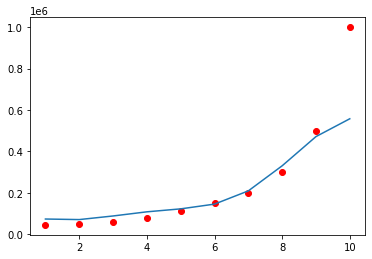

In [43]:
plt.scatter(X, Y, color= "red")
plt.plot(X, Yscaler.inverse_transform(regressor.predict(scaledX)))

## Visualising the SVR results (for higher resolution and smoother curve)

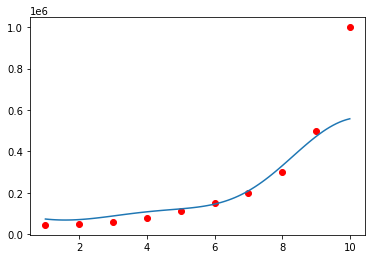

In [44]:
xSmooth = np.arange(min(X), max(X)+0.1, 0.1)
xSmooth = xSmooth.reshape((len(xSmooth), 1))
plt.scatter(X,Y, color = 'red')
plt.plot(xSmooth, Yscaler.inverse_transform(regressor.predict(Xscaler.transform(xSmooth))))

